In [5]:
import numpy as np

from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, execute
from qiskit.tools.jupyter import *
provider = IBMQ.load_account()

from qiskit.visualization import plot_histogram

ibmqfactory.load_account:WARNING:2020-10-23 17:08:56,347: Credentials are already in use. The existing account in the session will be replaced.


In [6]:
def dj_oracle(case, n):
    oracle_qc = QuantumCircuit(n+1)

    if case == "balanced":
        for qubit in range(n):
            oracle_qc.cx(qubit, n)

    if case == "constant":
        output = np.random.randint(2)
        if output == 1:
            oracle_qc.x(n)

    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = 'Oracle'
    
    return oracle_gate

In [7]:
def dj_algorithm(n, case = 'random'):
    dj_circuit = QuantumCircuit(n+1, n)

    for qubit in range(n):
        dj_circuit.h(qubit)

    dj_circuit.x(n)
    dj_circuit.h(n)

    if case == 'random':
        random = np.random.randint(2)
        if random == 0:
            case = 'constant'
        else:
            case = 'balanced'

    oracle = dj_oracle(case, n)
    dj_circuit.append(oracle, range(n+1))

    for i in range (n):
        dj_circuit.h(i)
        dj_circuit.measure(i,i)

    return dj_circuit

In [8]:
n = 4
dj_circuit = dj_algorithm(n)
dj_circuit.draw()

┌───┐     ┌─────────┐┌───┐┌─┐         
q_0: ┤ H ├─────┤0        ├┤ H ├┤M├─────────
     ├───┤     │         │├───┤└╥┘┌─┐      
q_1: ┤ H ├─────┤1        ├┤ H ├─╫─┤M├──────
     ├───┤     │         │├───┤ ║ └╥┘┌─┐   
q_2: ┤ H ├─────┤2 Oracle ├┤ H ├─╫──╫─┤M├───
     ├───┤     │         │├───┤ ║  ║ └╥┘┌─┐
q_3: ┤ H ├─────┤3        ├┤ H ├─╫──╫──╫─┤M├
     ├───┤┌───┐│         │└───┘ ║  ║  ║ └╥┘
q_4: ┤ X ├┤ H ├┤4        ├──────╫──╫──╫──╫─
     └───┘└───┘└─────────┘      ║  ║  ║  ║ 
c: 4/═══════════════════════════╩══╩══╩══╩═
                                0  1  2  3

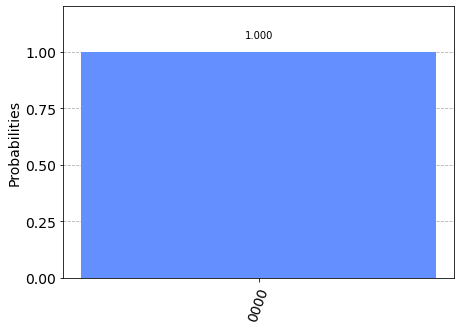

In [9]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
dj_circuit = dj_algorithm(n,'constant')
results = execute(dj_circuit, backend = backend, shots = shots).result()
answer = results.get_counts()

plot_histogram(answer)

In [14]:
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (n+1) and not x.configuration().simulator and x.status().operational==True))
print('least busy backend: ', backend)

%qiskit_job_watcher
dj_circuit = dj_algorithm(n)
job = execute(dj_circuit, backend = backend, shots = shots, optimization_level=3)

least busy backend:  ibmq_ourense


Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

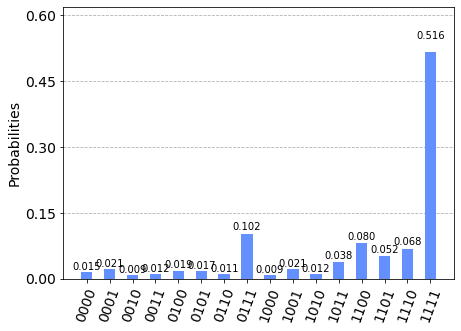

In [15]:
results = job.result()
answer = results.get_counts()
plot_histogram(answer)